# Assessing the Severity of London's Road Traffic Accident and Its Contributing Factors

## Preparation

- [Github Link](https://github.com/jasminemhdn/CASA0006.git)

- Number of words: 1496

- Runtime: 3 minutes (*Memory 8 GB, CPU Intel i7-10510U CPU @1.80GHz*)

- Coding environment: Jupyter Notebook

- License: this notebook is made available under the [Creative Commons Attribution license](https://creativecommons.org/licenses/by/4.0/).

- Additional library *[libraries not included in SDS Docker or not used in this module]*: -

## Table of contents

1. [Introduction](#Introduction)

1. [Research questions](#Research-questions)

1. [Data](#Data)

1. [Methodology](#Methodology)

1. [Results and discussion](#Results-and-discussion)

1. [Conclusion](#Conclusion)

1. [References](#References)

## Introduction

[[ go back to the top ]](#Table-of-contents)

Rapid development of society has increasing the human's mobility and the use of vehicles ([Meng, Wang and Wang, 2018](https://doi.org/10.1145/3297067.3297093); [Zhao et al., 2020](https://doi.org/10.1109/GCWkshps50303.2020.9367497)). This phenomenon lead to increasing road traffic accident and causing serious problems in human lives ([Kumeda et al., 2019](https://doi.org/10.1109/ICCSN.2019.8905362)). Road traffic accident (RTA) is a collision involving one or more vehicles with or without roadside object which can result in property damage, injuries, or fatalities and give significant economic and social impacts on society ([Assi, 2020](https://doi.org/10.3390/ijerph17207598); [Chai et al., 2024](https://doi.org/10.1016/j.engappai.2024.109086)). Thousands of people died due to traffic accident annually and it becomes one of the most important concerns in the world ([Ashikuzzaman et al., 2021](https://doi.org/10.11591/ijeecs.v24.i3.pp1796-1803); [Santos et al., 2021](https://doi.org/10.3390/computers10120157)). Due to the importance of this issue, the Mayor of London launched Vision Zero ambition that aim to eliminate deaths and serious injuries from RTA by 2041 ([MAYOR OF LONDON, 2018](https://content.tfl.gov.uk/vision-zero-action-plan.pdf)). Since the policy was applied, the number of fatalities and injuries has been reduced with 2023 as the year with second lowest number after the pandemic year of 2021 ([Transport for London, 2024](https://tfl.gov.uk/info-for/media/press-releases/2024/may/new-statistics-show-lowest-number-of-people-killed-on-london-s-roads-outside-of-pandemic-years)). However, there are still so much to be done to achieve the goal.

## Research questions

[[ go back to the top ]](#Table-of-contents)

Providing safe road infrastructure is increasingly gaining attention worldwide as part of the effort to reduce road deaths and injuries ([Yang and Han, 2025](https://doi.org/10.1016/j.jsr.2025.02.017)). One of the first important step to improve road safety in the world is by understanding the major factors contributing to crash severity ([Kumeda et al., 2019](https://doi.org/10.1109/ICCSN.2019.8905362); [Sattar et al., 2023](https://doi.org/10.1007/s00521-022-07769-2)). The accurate prediction of RTA severity will help to generate crucial information, which can be used to adopt appropriate measures to reduces the aftermath of crashes ([Assi, 2020](https://doi.org/10.3390/ijerph17207598)). Therefore, to improve the safety of London's road, which part of the global cities, and support the Vision Zero ambition, this study aims to assessing the factors contributing to fatal road traffic accident in London. To address this aim, three research questions were developed:
1. Which area in London has high risk of fatal road traffic accident?

1. What are the major contributing factors to fatal road traffic accident?

To answer those questions, machine learning model for clustering and classification are used in this study. The machine learning models were choosed to overcome the limitation of statistical model that is based on several unrealistic assumptions and may yield biased model estimations ([Sattar et al., 2023](https://doi.org/10.1007/s00521-022-07769-2)). Moreover, the study utilised non-visual RTA data that gives information on potential factors on RTA severity such as weather conditions, lighting conditions, and road geometric conditions without needing too much computational time compares to visual data ([Chai et al., 2024](https://doi.org/10.1016/j.engappai.2024.109086)). 

### Requirements to run the analysis

In [1]:
## This code is used to import the packages used to run the analysis.

# Data processing
import pandas as pd
import numpy as np
import geopandas as gpd

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Data checking
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr, chi2_contingency
from sklearn.preprocessing import StandardScaler

# Clustering analysis
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Classification analysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import classification_report, roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score
from sklearn.utils import resample

## Data

[[ go back to the top ]](#Table-of-contents)

The study area of this study is London, which are divided into 33 boroughs and 4835 LSOAs. The clustering analysis will be done in those two different administration levels. The 2011 administration boundary dataset used for clustering visualisation were retrieved from [London Datastore](https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london). The administration boundary dataset use the older version to match with RTA dataset.

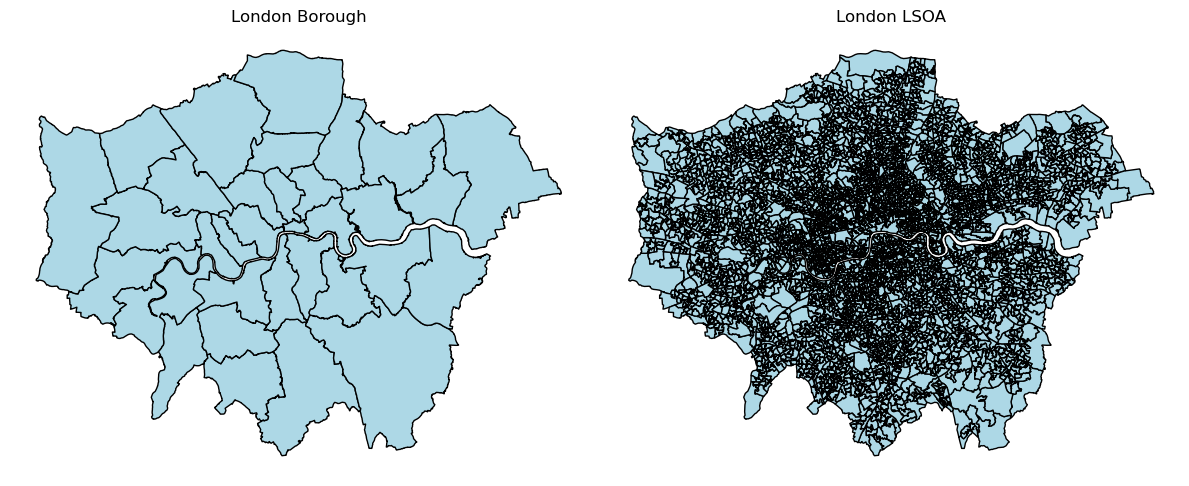

In [2]:
## This code is used to import the administration boundary and visualise it as maps.

# Import the boundary shapefiles
borough = gpd.read_file("London_Borough_Excluding_MHW.shp").rename(columns={'GSS_CODE': 'LAD11CD', 'NAME': 'LAD11NM'})
lsoa = gpd.read_file("LSOA_2011_London_gen_MHW.shp")

# Display the administration boundary in 1x2 maps
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot Borough
borough.plot(ax=axs[0], edgecolor='black', color='lightblue')
axs[0].set_title("London Borough")
axs[0].axis("off")

# Subplot LSOA
lsoa.plot(ax=axs[1], edgecolor='black', color='lightblue')
axs[1].set_title("London LSOA")
axs[1].axis("off")

plt.tight_layout()
plt.show()

The main dataset used in this study is [Road Safety data](https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-accidents-safety-data) from 2016 to 2023 because this is the latest update for the validated data.

| Method            | Variable                       | Type        |Description                                                                                 |
|-------------------|--------------------------------|-------------|--------------------------------------------------------------------------------------------|
| Clustering        | Severity Rate                  | Numeric     | The number of severe accident divided by total accident.                                   |
| Clustering        | High Vehicles Rate             | Numeric     | The number of accident with high number of vehicles involved divided by total accident.    |
| Clustering        | High Casualties Rate           | Numeric     | The number of accident with high casualties involved divided by total accident.            |
| Classification    | Accident Severity              | Categorical | The severity of accident categorised as severe and non-severe.                               |
| Classification    | Road Type                      | Categorical | The road type at accident site, categorised as roundabout, one way street, dual carriageway, single carriageway, slip road, and one way street/slip road. |
| Classification    | Light Condition                | Categorical | The light condition at accident site, categorised as daylight, street light lit, and darkness. |
| Classification    | Weather Condition              | Categorical | The weather condition at accident site, can be combination of high winds with raining or snowing, and fog or mist. |
| Classification    | Special Condition at Site      | Categorical | The special condition at accident site, such as auto traffic signal defective, road sign defective, roadworks, road surface defective, oil or diesel, and mud. |
| Classification    | Carriageway Hazards            | Categorical | The carriageway hazards at accident site, such as vehicle load on road, animal on road, pedestrian in carriageway, other object on road, and previous accident on road. |
| Classification    | Month                          | Categorical | The month the accident taken place.                                                        |
| Classification    | Speed Limit                    | Categorical | The speed limit on the road from 20 to 70 mph.                                             |

In [3]:
### This code is used to extract the RTA records from 2016 to 2023 and to filter the specific columns used in this study.
### Due to large data size, this code were run separately in different script file.

## Import Road Safety data
# collision = pd.read_csv("dft-road-casualty-statistics-collision-1979-latest-published-year.csv")

## Filter data from 2016
# collision = collision[collision['accident_year'] >= 2016]

## Choose relevant columns
# collision = collision[['accident_year', 'date', 'lsoa_of_accident_location',
#                        'accident_severity', 'number_of_vehicles', 'number_of_casualties',
#                        'road_type', 'speed_limit', 'weather_conditions', 'light_conditions',
#                        'carriageway_hazards', 'special_conditions_at_site']]

## Save the filtered data
# collision.to_csv("road_accident.csv", index=False)

In [4]:
## This code is used to extract label for categorical parameters from road safety data guide.

# Import road safety data guide
guide = pd.ExcelFile("dft-road-casualty-statistics-road-safety-open-dataset-data-guide-2024.xlsx")
code_list = guide.parse('2024_code_list')

# Extract attributes information
columns = ['accident_severity', 'road_type', 'weather_conditions', 
           'carriageway_hazards', 'light_conditions', 'special_conditions_at_site']
           
# Filter code list to only relevant columns
coded_fields = code_list[code_list['field name'].isin(columns)]

# Define exclusion keywords
exclude_keywords = ['unknown', 'missing', 'out of range']

# Generate dictionary of cleaned dataframe for each parameters
field_dataframes = {}
for field in coded_fields['field name'].unique():
    df = coded_fields[coded_fields['field name'] == field][['code/format', 'label']].copy()
    df = df.rename(columns={'code/format': 'value'}).dropna()
    df = df[~df['label'].str.lower().str.contains('|'.join(exclude_keywords))]
    df = df.reset_index(drop=True)
    field_dataframes[field] = df

In [5]:
## This code is used to import and clean the road safety data from missing or unknown values.

# Import collision data
collision = pd.read_csv("road_accident.csv")

# Remove null and duplicates values in rows
collision.dropna(inplace=True)
collision.drop_duplicates(inplace=True)
collision.shape

# Convert object to string data types (accident_index and lsoa_of_accident_location)
collision['lsoa_of_accident_location'] = collision['lsoa_of_accident_location'].astype(str)

# Convert float to int data types (speed_limit)
collision['speed_limit'] = collision['speed_limit'].astype(int)

# Remove unknown values (9 or 99) and missing values (-1)
unknown_values = {'road_type': [-1, 9],
                  'speed_limit': [-1, 99],
                  'light_conditions': [-1],
                  'weather_conditions': [-1, 8, 9],
                  'special_conditions_at_site': [-1, 9],
                  'carriageway_hazards': [-1, 9],
                  'lsoa_of_accident_location': ['-1']}
for field, unknown in unknown_values.items():
    collision = collision[~collision[field].isin(unknown)]

In [6]:
## This code is used to filter Road Safety Data for London area

# Merge collision with lsoa
collision = collision.merge(lsoa, how='left', left_on='lsoa_of_accident_location', right_on='LSOA11CD')

# Remove unused columns from lsoa data
drop_columns = {'lsoa_of_accident_location', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'RGN11CD', 'RGN11NM',
                'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN', 'HHOLDS', 'AVHHOLDSZ', 'geometry'}
collision = collision.drop(columns=drop_columns)

# Remove non London records
collision.dropna(inplace=True)
collision.head()

,accident_year,date,accident_severity,weather_conditions,light_conditions,number_of_vehicles,number_of_casualties,road_type,speed_limit,special_conditions_at_site,carriageway_hazards,LSOA11CD,LAD11NM
0,2016,01/11/2016,3,1,5,2,1,6,30,0,0,E01000543,Brent
1,2016,01/11/2016,3,1,4,1,1,6,30,0,0,E01000375,Bexley
2,2016,01/11/2016,3,1,4,1,1,1,30,0,0,E01033725,Hillingdon
3,2016,01/11/2016,3,1,1,1,1,6,30,0,0,E01003379,Merton
4,2016,01/11/2016,3,1,1,2,1,3,40,0,0,E01002583,Hounslow


In [7]:
collision.dtypes

accident_year                  int64
date                          object
accident_severity              int64
weather_conditions             int64
light_conditions               int64
number_of_vehicles             int64
number_of_casualties           int64
road_type                      int64
speed_limit                    int32
special_conditions_at_site     int64
carriageway_hazards            int64
LSOA11CD                      object
LAD11NM                       object
dtype: object

### Accident Severity

In the [Road Safety data](https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-accidents-safety-data), accident severity is divided into three categories: fatal, serious, and slight. Based from [Kumeda et al. (2019)](https://doi.org/10.1109/ICCSN.2019.8905362), fatal is an accident result in at least death of one person, serious is an accident result in severe physical injuries of a person that takes more than 2 days of spent in hospitals and slight is a simple injury which may be medicated easily with less than 2 days.

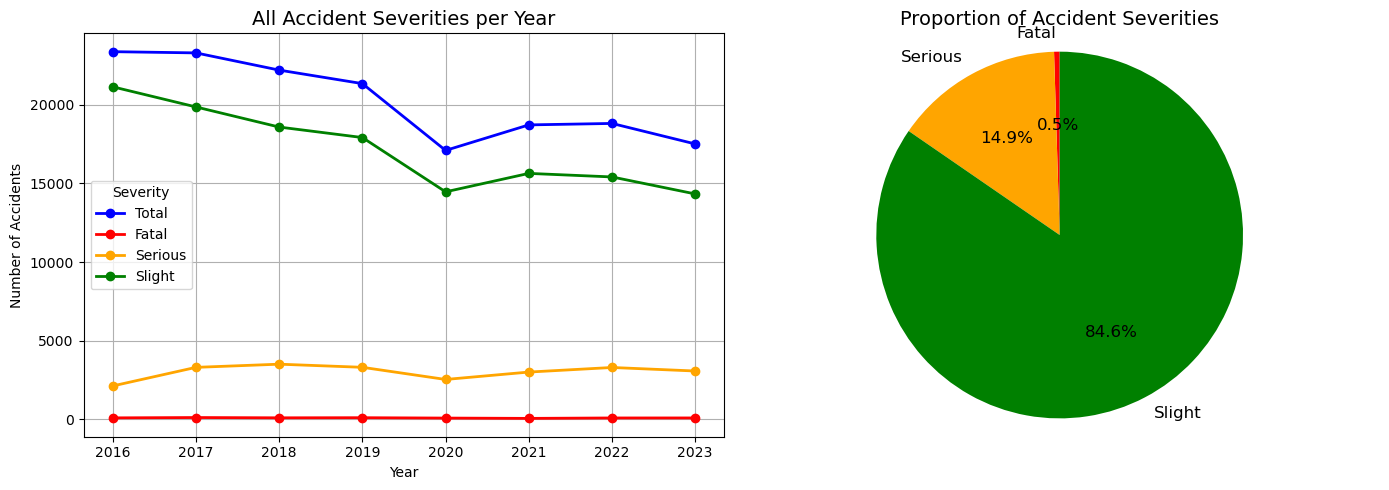

In [8]:
## This code is used to shows the proportion of fatal, serious, and slight accident in Road Safety data

# Time series of number of accident, fatal accident, serious accident, and slight accident
accident_counts = collision.groupby(['accident_year', 'accident_severity']).size().unstack(fill_value=0)
accident_counts.columns = ['Fatal', 'Serious', 'Slight']
accident_counts['Total'] = accident_counts.sum(axis=1)

# Pie chart of proportion of fatal, serious, and slight accident
accident_totals = accident_counts[['Fatal', 'Serious', 'Slight']].sum()
colors = ['red', 'orange', 'green']
labels = accident_totals.index
sizes = accident_totals.values

# Display the time series and pie chart into 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Time Series Subplot
accident_counts.plot(y=['Total', 'Fatal', 'Serious', 'Slight'],
                     color={'Total': 'blue', 'Fatal': 'red', 'Serious': 'orange', 'Slight': 'green'},
                     marker='o', linewidth=2, ax=axs[0])
axs[0].set_title("All Accident Severities per Year", fontsize=14)
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Number of Accidents")
axs[0].grid(True)
axs[0].legend(title="Severity")

# Pie Chart Subplot
axs[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
           colors=colors, textprops={'fontsize': 12})
axs[1].set_title("Proportion of Accident Severities", fontsize=14)
axs[1].axis('equal')

plt.tight_layout()
plt.show()

As the figures shown above, the proportion of fatal accident is extremely small (0.5%) and serious accident only accounted for 15.6%. This class imbalanced will make the learning ability of the machine learning model become weak because the prediction accuracy highly skewed towards the majority class ([Molinara, Ricamato and Tortorella, 2007](https://doi.org/10.1109/ICIAP.2007.4362755)). However, the aim of this study is to predict the fatal accident as accurately as possible and as Vision Zero ambition is to eliminate death and serious injuries, therefore, this study aggregates fatal and serious injury into severe category while slight is labeled as non-severe just like the previous studies also done before ([Assi, 2020](https://doi.org/10.3390/ijerph17207598); [Sattar et al., 2023](https://doi.org/10.1007/s00521-022-07769-2)).

In [9]:
## This code is used to aggregate fatal and serious accident into severe category

# Merge fatal (1) and serious (2) into the same severe category (1) and slight (3) as non-severe (0) for classification analysis
collision['severe_accident'] = collision['accident_severity'].isin([1, 2]).astype(int)
collision = collision.drop(columns=['accident_severity'])

### High Vehicles and High Casualties

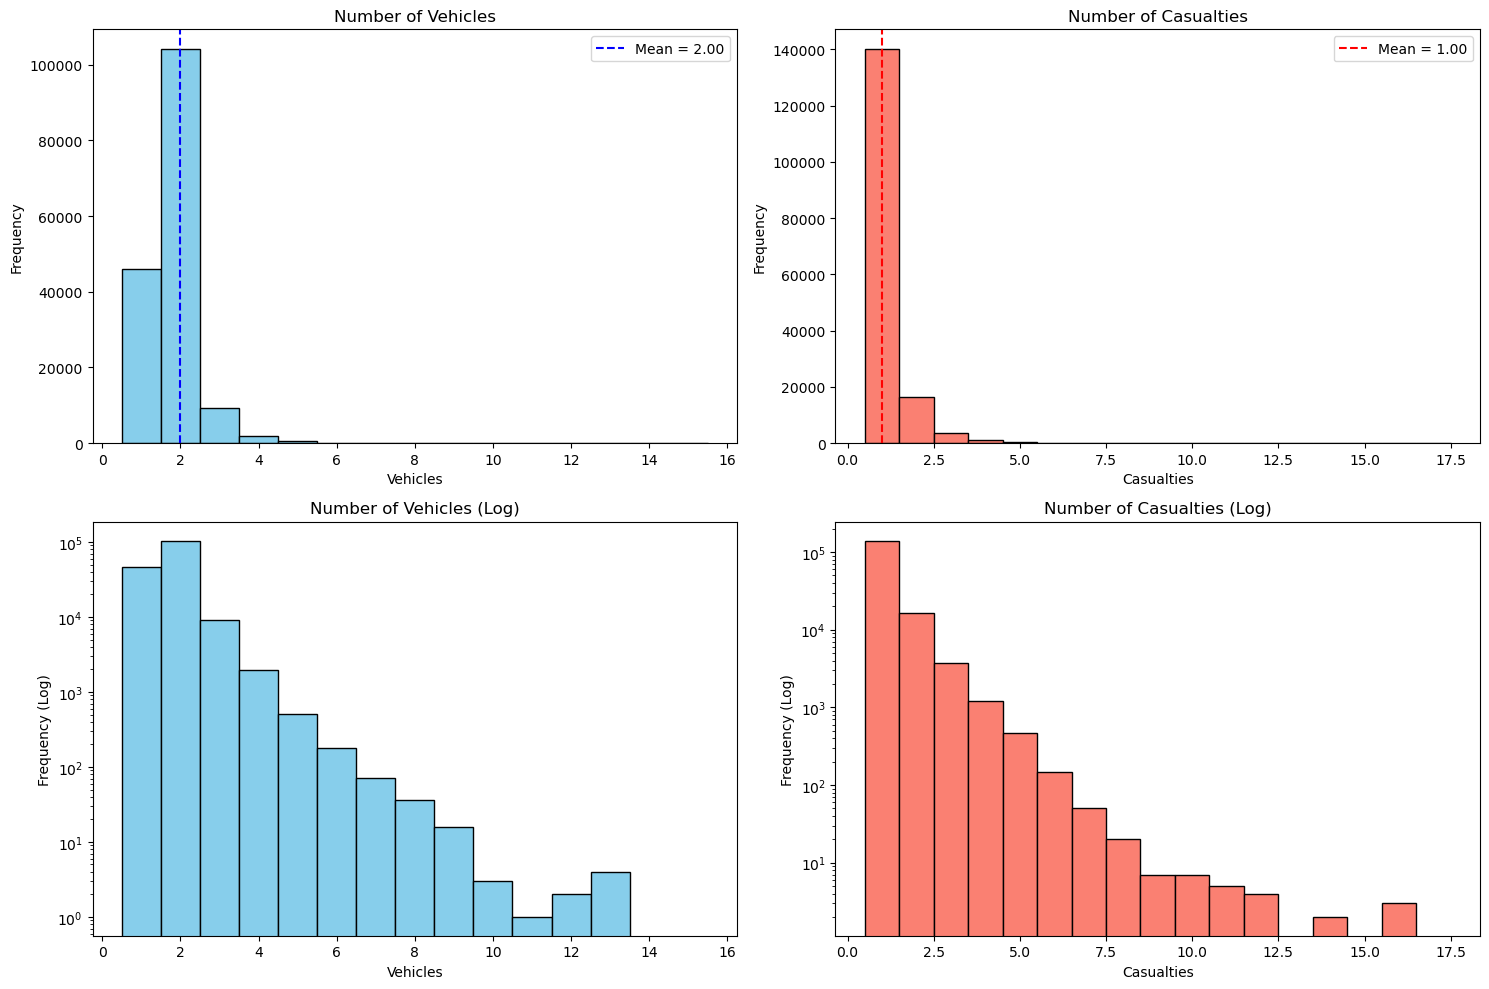

In [10]:
## This code is used to visualise the distritbuion of vehicles and casualties involved in RTA

# Display the distribution plot in 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Calculate means
mean_vehicles = collision['number_of_vehicles'].mean().round()
mean_casualties = collision['number_of_casualties'].mean().round()

# Bins
bins_vehicles = range(collision['number_of_vehicles'].min(), collision['number_of_vehicles'].max())
bins_casualties = range(collision['number_of_casualties'].min(), collision['number_of_casualties'].max())

# Subplot vehicles
axs[0, 0].hist(collision['number_of_vehicles'], bins=bins_vehicles, color='skyblue', edgecolor='black', align='left')
axs[0, 0].axvline(mean_vehicles, color='blue', linestyle='dashed', linewidth=1.5, label=f'Mean = {mean_vehicles:.2f}')
axs[0, 0].set_title('Number of Vehicles')
axs[0, 0].set_xlabel('Vehicles')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].legend()

# Subplot casualties
axs[0, 1].hist(collision['number_of_casualties'], bins=bins_casualties, color='salmon', edgecolor='black', align='left')
axs[0, 1].axvline(mean_casualties, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean = {mean_casualties:.2f}')
axs[0, 1].set_title('Number of Casualties')
axs[0, 1].set_xlabel('Casualties')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].legend()

# Subplot vehicles (log)
axs[1, 0].hist(collision['number_of_vehicles'], bins=bins_vehicles, color='skyblue', edgecolor='black', align='left')
axs[1, 0].set_title('Number of Vehicles (Log)')
axs[1, 0].set_xlabel('Vehicles')
axs[1, 0].set_ylabel('Frequency (Log)')
axs[1, 0].set_yscale('log')

# Subplot casualties (log)
axs[1, 1].hist(collision['number_of_casualties'], bins=bins_casualties, color='salmon', edgecolor='black', align='left')
axs[1, 1].set_title('Number of Casualties (Log)')
axs[1, 1].set_xlabel('Casualties')
axs[1, 1].set_ylabel('Frequency (Log)')
axs[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()

As can be seen from the figures above, the distribution of vehicles and casualties involved are very skewed and using mean, median, or majority data for aggregate method may not representative. Therefore, classification of high and low are used to aggregate this data into LSOA and Borough. The threshold to define the high vehicles and high casualties is based from the average number of vehicles and casualties involved.

In [11]:
## This code is used to classify the number of vehicles and casualties into high and low categories

## Classify the accident with more than 2 vehicles involves as high categories
collision['high_vehicles'] = (collision['number_of_vehicles'] > 2).astype(int)

## Classify the accident with more than 1 casualties as high categories
collision['high_casualties'] = (collision['number_of_casualties'] > 1).astype(int)

### Data Transformation

In [12]:
## This code is used to extract month from date column

# Extract month from date
collision['datetime'] = pd.to_datetime(collision['date'], dayfirst=True)
collision['month'] = collision['datetime'].dt.month
collision.drop(columns=['date', 'datetime'], inplace=True)

In [13]:
## This code is used to extract light conditions into separate columns

# Extract different types of light into separate columns
collision['daylight'] = collision['light_conditions'].isin([1]).astype(int)
collision['street_light'] = collision['light_conditions'].isin([4]).astype(int)
collision['darkness'] = collision['light_conditions'].isin([5, 6]).astype(int)

In [14]:
## This code is used to extract weather into separate columns

# Extract different types of weather into separate columns
collision['rain'] = collision['weather_conditions'].isin([2, 5]).astype(int)
collision['snow'] = collision['weather_conditions'].isin([3, 6]).astype(int)
collision['high_wind'] = collision['weather_conditions'].isin([4, 5, 6]).astype(int)
collision['fog_mist'] = (collision['weather_conditions'] == 7).astype(int)

In [15]:
# This code is used to merge auto traffic signal into same category in special conditions at site

# Merge the auto traffic signal - out (1) and auto signal part defective (2) into the same category
collision['special_conditions_at_site'] = collision['special_conditions_at_site'].replace({2: 1})
collision['special_conditions_at_site'] = collision['special_conditions_at_site'].replace({3: 2})
collision['special_conditions_at_site'] = collision['special_conditions_at_site'].replace({4: 3})
collision['special_conditions_at_site'] = collision['special_conditions_at_site'].replace({5: 4})
collision['special_conditions_at_site'] = collision['special_conditions_at_site'].replace({6: 5})
collision['special_conditions_at_site'] = collision['special_conditions_at_site'].replace({7: 6})

# Update the labelling for special_conditions_at_site
specialcon_labels = field_dataframes['special_conditions_at_site']
specialcon_labels.loc[specialcon_labels['value'] == 1, 'label'] = 'Auto trafic signal defective'
specialcon_labels.loc[specialcon_labels['value'] == 2, 'label'] = 'Road sign defective'
specialcon_labels.loc[specialcon_labels['value'] == 3, 'label'] = 'Roadworks'
specialcon_labels.loc[specialcon_labels['value'] == 4, 'label'] = 'Road surface defective'
specialcon_labels.loc[specialcon_labels['value'] == 5, 'label'] = 'Oil or diesel'
specialcon_labels.loc[specialcon_labels['value'] == 6, 'label'] = 'Mud'
specialcon_labels = specialcon_labels[~specialcon_labels['value'].isin([7])].reset_index(drop=True)
field_dataframes['special_conditions_at_site'] = specialcon_labels

In [16]:
# This code is used to merge all kinds of animal into same category in carriageway hazards

# Merge the dog on road (4), animals on road (5), and other animals in carriageway (7) into the same category
collision['carriageway_hazards'] = collision['carriageway_hazards'].replace({5: 4, 7: 4})
collision['carriageway_hazards'] = collision['carriageway_hazards'].replace({6: 5})

# Update the labelling for carriageway_hazards
carriageway_labels = field_dataframes['carriageway_hazards']
carriageway_labels.loc[carriageway_labels['value'] == 4, 'label'] = 'Animal on road'
carriageway_labels.loc[carriageway_labels['value'] == 5, 'label'] = 'Pedestrian in carriageway - not injured'
carriageway_labels = carriageway_labels[~carriageway_labels['value'].isin([6, 7])].reset_index(drop=True)
field_dataframes['carriageway_hazards'] = carriageway_labels

## Methodology

[[ go back to the top ]](#Table-of-contents)

![Flowchart.png](Flowchart.png)

### Clustering Analysis

For the RQ1, Hierarchical clustering was chosen as previous study found this approach is more effective than other clustering methods in exploring RTA dataset ([Kamh et al., 2025](https://doi.org/10.1109/ACCESS.2024.3443245)). Hierarchical clustering is a method which builds a hierarchical tree of clusters and can be represented in dendrograms ([Santos et al., 2021](https://doi.org/10.3390/computers10120157); [Vybhavi et al., 2024]( https://doi.org/10.1063/5.0215042)). Hierarchical clustering can be performed from bottom-up or top-down process ([Debnath, Tripathi and Elmasri, 2015](https://doi.org/10.1109/DMIA.2015.14)). This study will use bottom-up or Agglomerative clustering approach with help of dendrogram to choose the number of cluster. Before the clustering method is performed, the data will be aggregated to LSOA by calculating the rate of severity, high vehicles, and high casualties. Then, multicollinearity test is done using VIF and Pearson correlation and data is normalised using MinMax scalling method. Silhouette, Calinski-Harabasz, and Davies-Bouldin scores will be used to evaluate the performance.

In [17]:
## This code is used to calculate the rate of severity, high vehicles, and high casualties

# Function to aggregate severity, high vehicles, and high casualties per area
def aggregate_rate(df, group_by='LSOA11CD'):
    grouped = df.groupby(group_by).agg(severe=('severe_accident', 'sum'),
                                       high_vehicles=('high_vehicles', 'sum'),
                                       high_casualties=('high_casualties', 'sum'),
                                       total_accident=('severe_accident', 'count')).reset_index()
    grouped['severe_rate'] = grouped['severe'] / grouped['total_accident']
    grouped['vehicles_rate'] = grouped['high_vehicles'] / grouped['total_accident']
    grouped['casualties_rate'] = grouped['high_casualties'] / grouped['total_accident']
    return grouped

In [18]:
## This code is used to check for multicollinearity

# Function to check VIF
def vif(df, features):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])
    vif_df = pd.DataFrame()
    vif_df['Feature'] = features
    vif_df['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    print(vif_df)

# Function to check multicollinearity for numerical variables
def pearson(df, features):
    corr_matrix = df[features].corr(method='pearson')
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
    plt.title("Pearson Correlation Heatmap (Multicollinearity Check)")
    plt.show()

In [19]:
## This code is used to normalise the data using MinMax Scalling

# Function for minmax scalling
def minmax_scale(df, features, id_columns):
    X = df[features].copy()
    scaler = MinMaxScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X),
                            columns=features,
                            index=df.index)
    if id_columns:
        X_scaled = pd.concat([df[id_columns].reset_index(drop=True), X_scaled.reset_index(drop=True)], axis=1)
    summary = X_scaled[features].agg(['min', 'max', 'mean', 'std']).T
    summary.columns = ['Min', 'Max', 'Mean', 'Std Dev']
    print(summary)
    return X_scaled

In [20]:
## This code is used for plotting dendrogram

# Function for plotting dendrogram
def hierarchical_dendrogram(X, method='average', metric='euclidean', truncate_mode='lastp', p=30):
    Z = linkage(X, method=method, metric=metric)
    plt.figure(figsize=(12, 5))
    dendrogram(Z, truncate_mode=truncate_mode, p=p, show_leaf_counts=True, leaf_rotation=90.)
    plt.title(f"Hierarchical Dendrogram (method='{method}', metric='{metric}')")
    plt.xlabel("Cluster or Sample")
    plt.ylabel("Distance")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return Z

In [21]:
# This code is used to calculate the evaluation metrics for clustering

# Function for performance metrics
def hierarchical_metrics(X, Z, k_values):
    results = []
    for k in k_values:
        labels = fcluster(Z, k, criterion='maxclust')
        sil = silhouette_score(X, labels)
        cal = calinski_harabasz_score(X, labels)
        dbi = davies_bouldin_score(X, labels)
        results.append({'k': k,
                        'silhouette_score': sil,
                        'calinski-harabasz_score': cal,
                        'davies-bouldin_score': dbi})
    return pd.DataFrame(results)

In [22]:
## This code is used for performing hierarchical clustering

# Function for hierarchical clustering
def hierarchical_clustering(gdf, df, features, k, method='average', metric='euclidean', area='LSOA11CD'):
    X = df[features].copy()
    scaler = MinMaxScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features, index=df.index)
    Z = linkage(X_scaled, method=method, metric=metric)
    labels = fcluster(Z, k, criterion='maxclust')
    df['cluster'] = labels
    summary = df.groupby('cluster')[features].agg(['mean', 'std'])
    display(summary)
    cluster_df = df[[area, 'cluster']].copy()
    return cluster_df

### Classification

For RQ2, Gradient Boosted Regression Tree (GBDT) was choosen because it has the ability to find non-linear tranformations and proven to be better in handle the skewed variables of RTA dataset without requiring transformations ([Meng, Wang and Wang, 2018](https://doi.org/10.1145/3297067.3297093); [Chai et al., 2024](https://doi.org/10.1016/j.engappai.2024.109086)). However, for highly skewed dataset like in the London RTA, it might still dimnishes the effectiveness of GBDT ([Luo, Yuan and Xu, 2025](https://doi.org/10.1016/j.neucom.2025.129896)), therefore, undersampling will be done to balance the training dataset. Before running GBDT mode, multicolllinearity test using Cramer's V correlation for categorical data ([Rayward-Smith, 2007](https://doi.org/10.1016/j.csda.2006.05.025)), splitting data into 70% training and 30% testing ([Assi, 2020](https://doi.org/10.3390/ijerph17207598); [Ashikuzzaman et al., 2021](https://doi.org/10.11591/ijeecs.v24.i3.pp1796-1803); [Sattar et al., 2023](https://doi.org/10.1007/s00521-022-07769-2)), hyperparameter tuning, and k-fold cross-validation will be done first ([Paing et al., 2018](https://doi.org/10.1109/BMEiCON.2018.8609946)). Then, feature importance will be extracted to get the most important factors contributing to severity of RTA.

In [23]:
## This code is used to calculate Cramer's V correlation coefficient for categorical variables

# Function to check multicollinearity for categorical variables
def cramers(df, features):
    matrix = pd.DataFrame(index=features, columns=features)
    for var1 in features:
        for var2 in features:
            confusion_matrix = pd.crosstab(df[var1], df[var2])
            chi2 = chi2_contingency(confusion_matrix)[0]
            n = confusion_matrix.sum().sum()
            phi2 = chi2 / n
            r, k = confusion_matrix.shape
            phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            value = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
            matrix.loc[var1, var2] = value
    matrix = matrix.astype(float)
    plt.figure(figsize=(16, 8))
    sns.heatmap(matrix, fmt='.2f', annot=True, cmap='coolwarm', square=True, linewidths=0.5)
    plt.title("Cramer's V Correlation Matrix (Categorical Variables)")
    plt.tight_layout()
    plt.show()

In [24]:
## This code is used to split dataset into training and testing

# Function to split the data globally
def split_train_test(X, y, test_size=0.3, random_state=42, stratify=True):
    if stratify:
        stratify_param = y
    else:
        stratify_param = None
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=test_size,
                                                        random_state=random_state,
                                                        stratify=stratify_param)
    return X_train, X_test, y_train, y_test

In [25]:
## This code is used to downsample the dataset

# Function for downsampling data
def downsample_data(X_train, y_train):
    df = X_train.copy()
    df['target'] = y_train
    majority = df['target'].value_counts().idxmax()
    df_majority = df[df['target'] == majority]
    df_minority = df[df['target'] != majority]
    df_majority_down = resample(df_majority, 
                                replace=False, 
                                n_samples=len(df_minority), 
                                random_state=42)
    df_bal = pd.concat([df_majority_down, df_minority])
    return df_bal.drop(columns='target'), df_bal['target']

In [26]:
## This code is used for hyperparameter tuning

# Function for hyperparameter tuning
def tune_hyperparameters(model, param_grid, X_train, y_train):
    grid = GridSearchCV(model, param_grid, scoring='roc_auc_ovr', cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid.best_estimator_, grid.best_params_, grid.best_score_

In [27]:
# This code is used to run 5-fold cross validation

# Function for cross validation
def cross_validate_model(model, X, y):
    scores = cross_validate(model, X, y, cv=5, scoring='roc_auc_ovr',
                            return_train_score=True, n_jobs=-1)
    mean_auc = scores['test_score'].mean()
    std_auc = scores['test_score'].std()
    print(f"Cross-validated ROC-AUC (OvR): {mean_auc:.4f} ± {std_auc:.4f}")
    return mean_auc, std_auc

In [28]:
# This code is used to run GBDT algorithm

# Function for Gradient Boosted Decision Tree
def gbdt(X_train, X_test, y_train, y_test):
    model = GradientBoostingClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, y_prob[:, 1])
    print(f"\n Multiclass ROC-AUC (OvR): {roc_auc:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title("Gradient Boosting Confusion Matrix")
    plt.show()
    pd.Series(model.feature_importances_, index=X_train.columns)\
        .sort_values(ascending=False)\
        .plot(kind='bar', title="Feature Importance (GBDT)", figsize=(10, 4))
    plt.tight_layout()
    plt.show()
    return model, roc_auc

## Results and discussion

[[ go back to the top ]](#Table-of-contents)

### Clustering Analysis

In [29]:
## This code is used to calculate the rate of severity, high vehicles, and high casualties

# Aggregating severity, vehicles, and casualites per lsoa by using function that already been written before
cluster_vars = ['severe_rate', 'vehicles_rate', 'casualties_rate']
collsoa = aggregate_rate(collision, group_by='LSOA11CD')

# MinMax Scaling to normalise all the rate values into 0-1
collsoa_scaled = minmax_scale(collsoa, cluster_vars, 'LSOA11CD')

                 Min  Max      Mean   Std Dev
severe_rate      0.0  1.0  0.153032  0.101771
vehicles_rate    0.0  1.0  0.081946  0.090094
casualties_rate  0.0  1.0  0.137576  0.110256


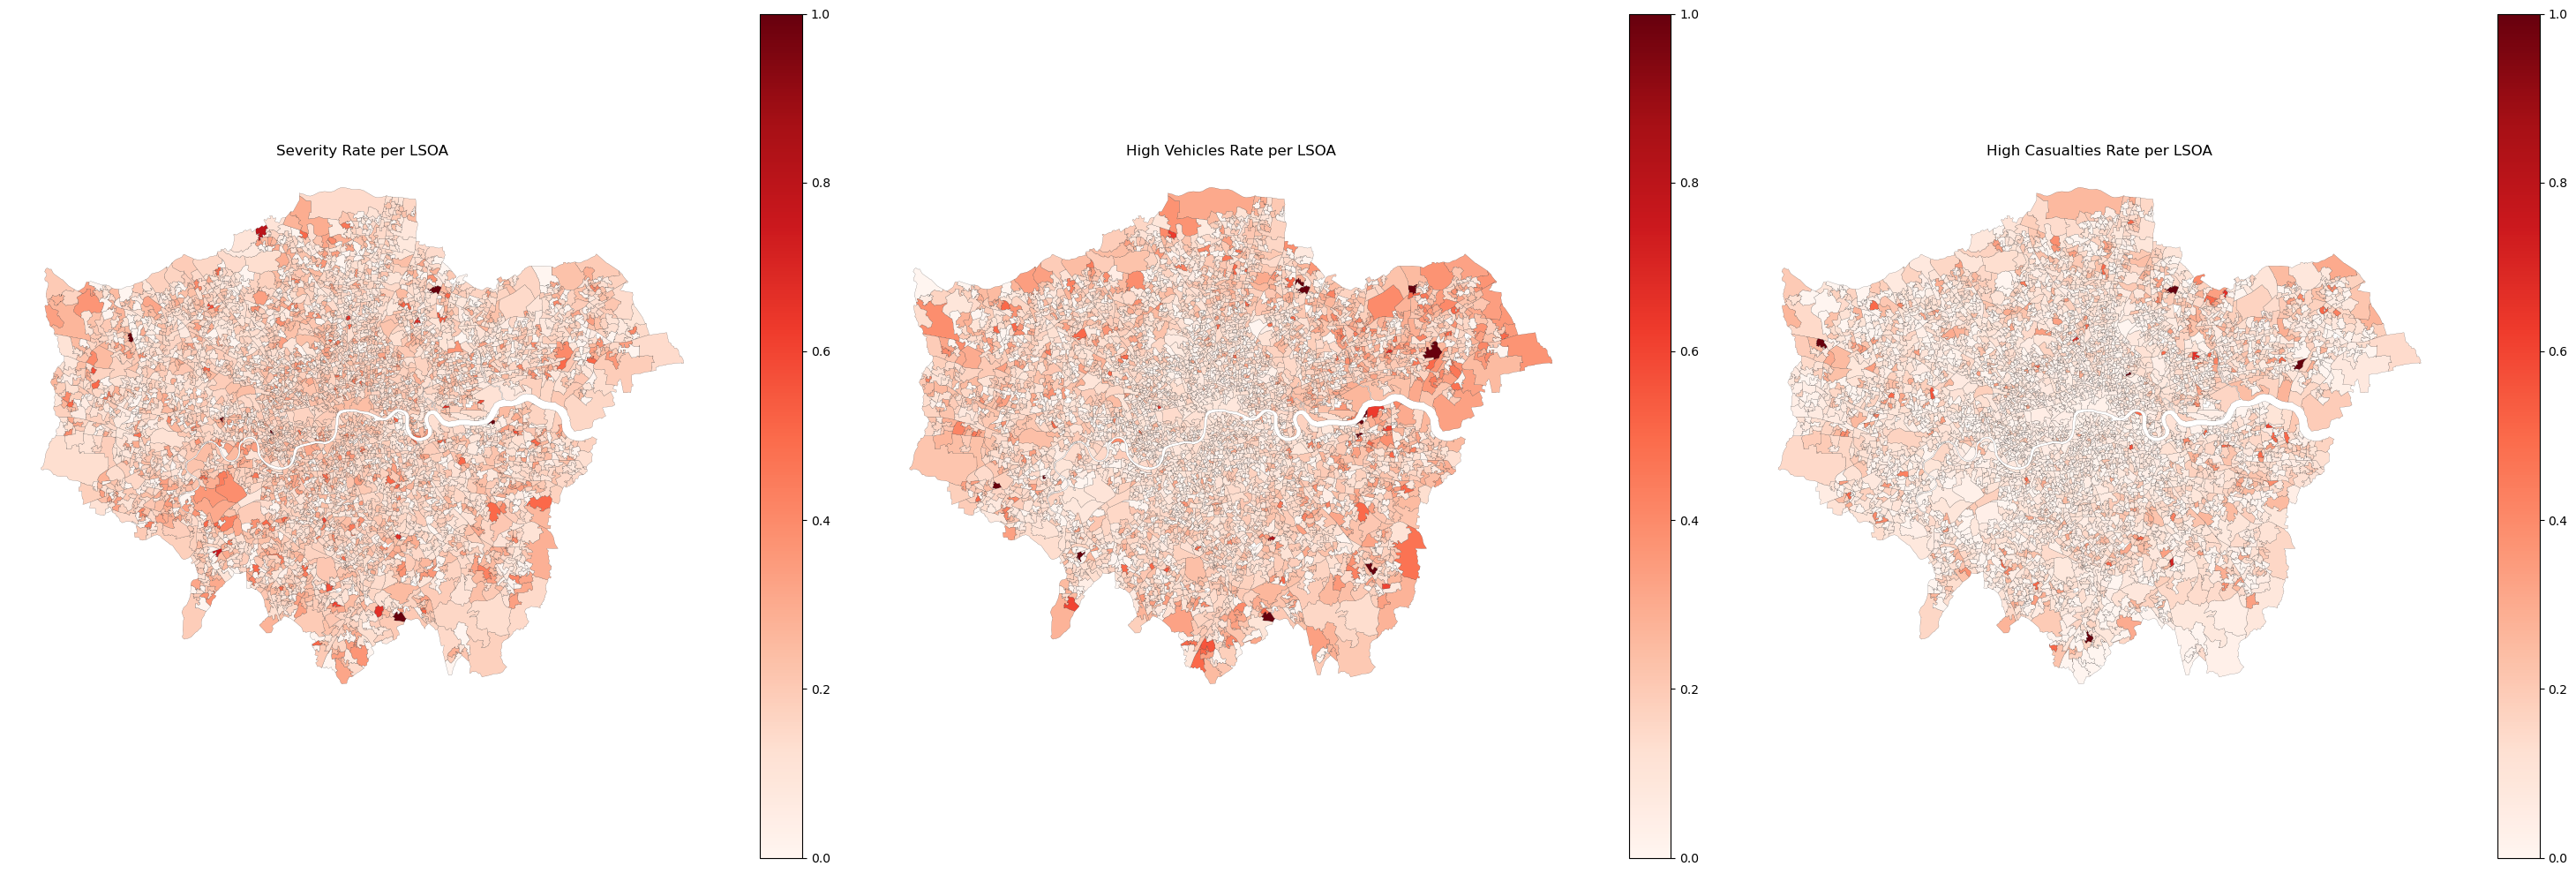

In [30]:
## This code is used to visualise the rate of severity, high vehicles, and high casualties per LSOA

# Merge collision LSOA with LSOA geodataframe
collsoa_gdf = lsoa.merge(collsoa_scaled, how='left', on='LSOA11CD')

# Display 1x3 maps
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

# Subpmap Severity Rate
collsoa_gdf.plot(column='severe_rate', cmap='Reds', linewidth=0.1, edgecolor='black', ax=axs[0], legend=True)
axs[0].set_title('Severity Rate per LSOA')
axs[0].axis('off')

# #Submap Vehicles Rate
collsoa_gdf.plot(column='vehicles_rate', cmap='Reds', linewidth=0.1, edgecolor='black', ax=axs[2], legend=True)
axs[1].set_title('High Vehicles Rate per LSOA')
axs[1].axis('off')

# Submap Casualties Rate
collsoa_gdf.plot(column='casualties_rate', cmap='Reds', linewidth=0.1, edgecolor='black', ax=axs[1], legend=True)
axs[2].set_title('High Casualties Rate per LSOA')
axs[2].axis('off')

plt.tight_layout()
plt.show()

Based from the maps above, it looks like severity rate is distributed quite evenly in all area of london with several LSOA are catgorised as high, meanwhile for high vehicles rate the outer part seems to have significant high rate compares to central London. For the high casualties rate, LSOA with lower rate seems to dominate more than other variables.

           Feature       VIF
2  casualties_rate  1.052394
1    vehicles_rate  1.051652
0      severe_rate  1.000863


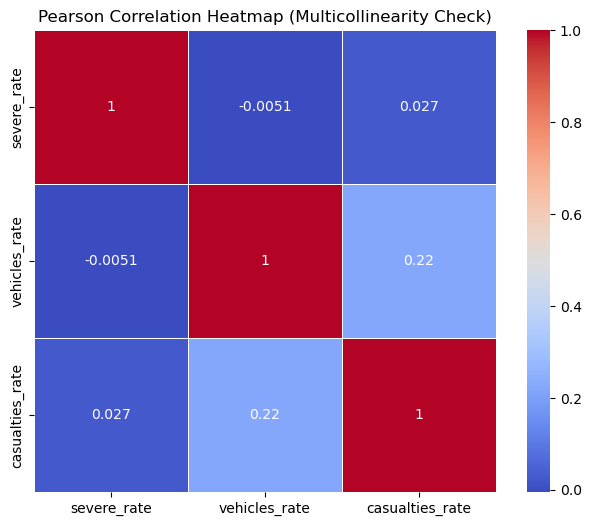

In [31]:
## This code is used to call the function to calculate VIF and Pearson's correlation coefficient

# VIF
vif(collsoa, cluster_vars)

# Pearson's correlation coefficient
pearson(collsoa, cluster_vars)

The multicollinearity check is done by using the rule from [Oukawa, Krecl and Targino (2022)](https://doi.org/10.1016/j.scitotenv.2021.152836) where variables will be kept if the coefficient rate is below 0.6 and VIF value is below 3. From the multicollinearity check, all of the variables fulfil all the requirements.

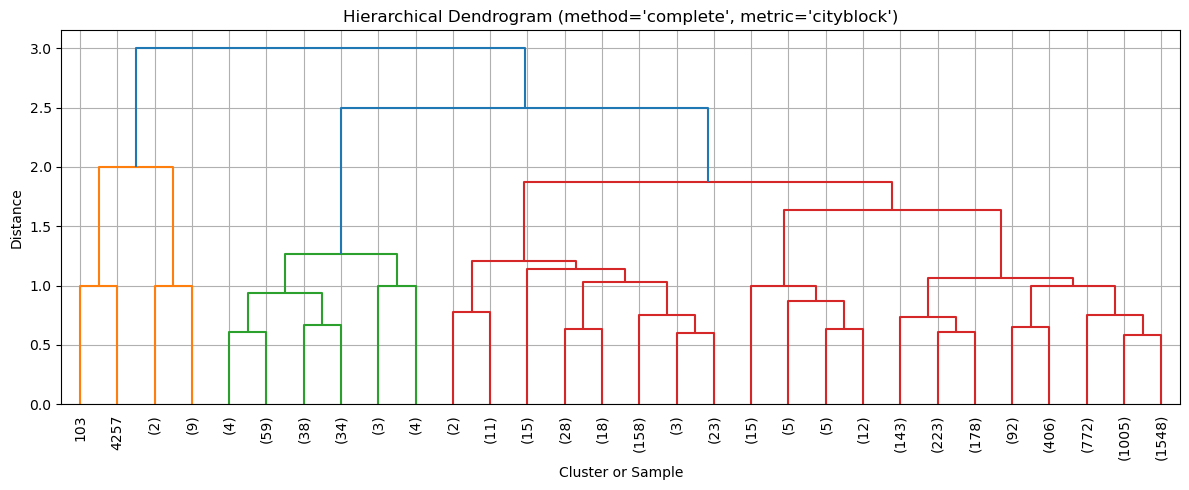

In [32]:
## This code is used to call the function to draw dendrogram for hierarchical clustering

# Dendrogram
Z = hierarchical_dendrogram(collsoa_scaled[cluster_vars], method='complete', metric='cityblock', truncate_mode='lastp', p=30)

The dendrogram is created based on linkage complete and distance metric cityblock or manhattan to maximum the distance in order to find significantly different clusters. Beside dendrogram, some metrics such as Silhouette score, Calinski-Harabasz score, and Davies-Bouldin score were also calculated to help in choosing the right number of clusters. Based from dendogram above and the result of performance metrics, the number of 3 clusters is choosen. Although 2 clusters seem to give better evaluation metrics result, the majority cluster will be too dominant as we can see from the dendrogram, meanwhile Silhouette score of 0.432383, Calinski-Harabasz of 376.849834, and Davies-Boulding 1.071495 is still deemed as acceptable.

In [33]:
## This code is used to perform evaluation metrics for different k clusters

# Calculate Silhouette score, Calinski-Harabasz score, and Davies-Bouldin score
k_values = [2, 3, 4, 5, 6]
hierarchical_metrics(collsoa_scaled[cluster_vars], Z, k_values)

,k,silhouette_score,calinski-harabasz_score,davies-bouldin_score
0,2,0.792758,320.214944,0.753175
1,3,0.432383,376.849834,1.071495
2,4,0.432830,284.903606,0.883651
3,5,0.386512,432.651846,0.938138
4,6,0.395535,446.844098,0.928707


In [34]:
## This code is used to perform hierarchical clustering

# Hierarchical clustering using k=3, linkage method=complete, distance metric=cityblock/manhattan
cluster = hierarchical_clustering(lsoa, collsoa_scaled, cluster_vars, k=3, method='complete', metric='cityblock')

severe_rate           vehicles_rate           casualties_rate  \
               mean       std          mean       std            mean   
cluster                                                                 
1          0.300000  0.432049      0.153846  0.375534        0.961538   
2          0.417423  0.149297      0.046179  0.069791        0.182571   
3          0.144569  0.085355      0.082835  0.088444        0.133908   

                   
              std  
cluster            
1        0.138675  
2        0.139495  
3        0.099769

Based from the table above, cluster 1 and 2 have higher mean value of severity rate, vehicles rate, and casualties rate. It seems that cluster 1 characterised LSOA with medium severity, high vehicles and high casualties, while LSOA in cluster 2 has high severity, low vehicles, and medium casualties.

In [35]:
## This code is used to make summary of cluster

# Merge cluster to lsoa
lsoa_cluster = pd.merge(cluster[['LSOA11CD', 'cluster']], lsoa[['LSOA11CD', 'LAD11NM']], on='LSOA11CD', how='right')

# Separate the cluster to different columns
cluster_dummies = pd.get_dummies(lsoa_cluster['cluster'], prefix='cluster')

# Merge to cluster again
lsoa_cluster123 = pd.concat([lsoa_cluster[['LSOA11CD', 'LAD11NM']], cluster_dummies], axis=1)

# Aggregate count of each cluster per borough
borough_cluster = lsoa_cluster123.groupby('LAD11NM').sum().reset_index()

# Calculate the total count per cluster
cluster_count = cluster_dummies.sum()
print(cluster_count)

cluster_1.0      13
cluster_2.0     142
cluster_3.0    4662
dtype: int64


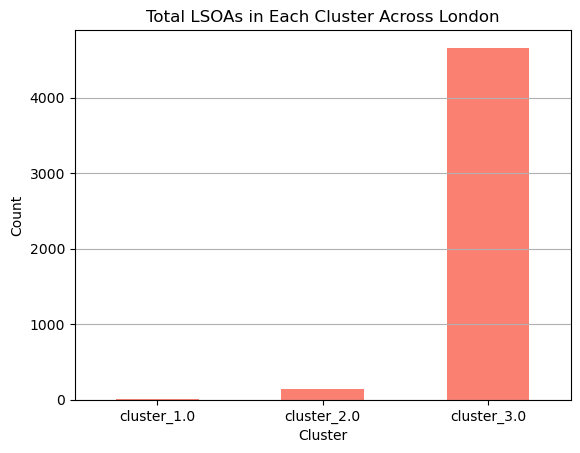

In [36]:
## This code is used to visualise the number of lsoa per cluster

# Plot total cluster count bar chart
cluster_count.plot(kind='bar', color='salmon')
plt.title('Total LSOAs in Each Cluster Across London')
plt.ylabel('Count')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

As we can see from the bar chart, after using 3 clusters, the majority cluster is still dominant with almost 97% of LSOA is categorised as cluster 3.

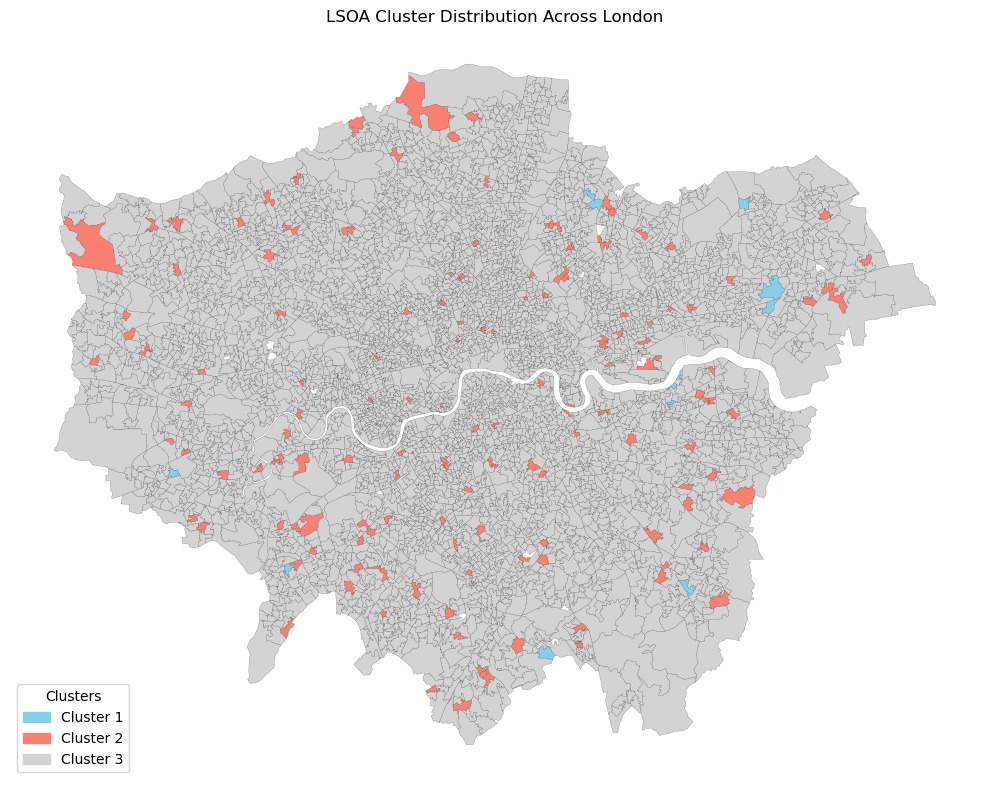

In [37]:
## This code is used to visualise cluster of each lsoa

# Merge with geometry data
lsoa_map = lsoa.merge(lsoa_cluster[['LSOA11CD', 'cluster']], on='LSOA11CD', how='left')

# Define color mapping for clusters
cluster_colors = {
    1: 'skyblue',
    2: 'salmon',
    3: 'lightgray'
}

# Remove LSOAs without a cluster assignment
lsoa_mapped = lsoa_map.dropna(subset=['cluster']).copy()

# Ensure cluster column is integer for mapping
lsoa_mapped['cluster'] = lsoa_mapped['cluster'].astype(int)

# Map cluster numbers to colors
lsoa_mapped['color'] = lsoa_mapped['cluster'].map(cluster_colors)

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
lsoa_mapped.plot(ax=ax, color=lsoa_mapped['color'], edgecolor='black', linewidth=0.1)

# Add point legend
legend_handles = [
    mpatches.Patch(color='skyblue', label='Cluster 1'),
    mpatches.Patch(color='salmon', label='Cluster 2'),
    mpatches.Patch(color='lightgray', label='Cluster 3')
]
ax.legend(handles=legend_handles, title='Clusters', loc='lower left')

plt.title('LSOA Cluster Distribution Across London')
plt.axis('off')
plt.tight_layout()
plt.show()

In this LSOA maps, cluster 2 are almost evenly distributed in London, while cluster 1 only located in the outer part of London.

C:\Users\Jasmine\AppData\Local\Temp\ipykernel_17808\66479486.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


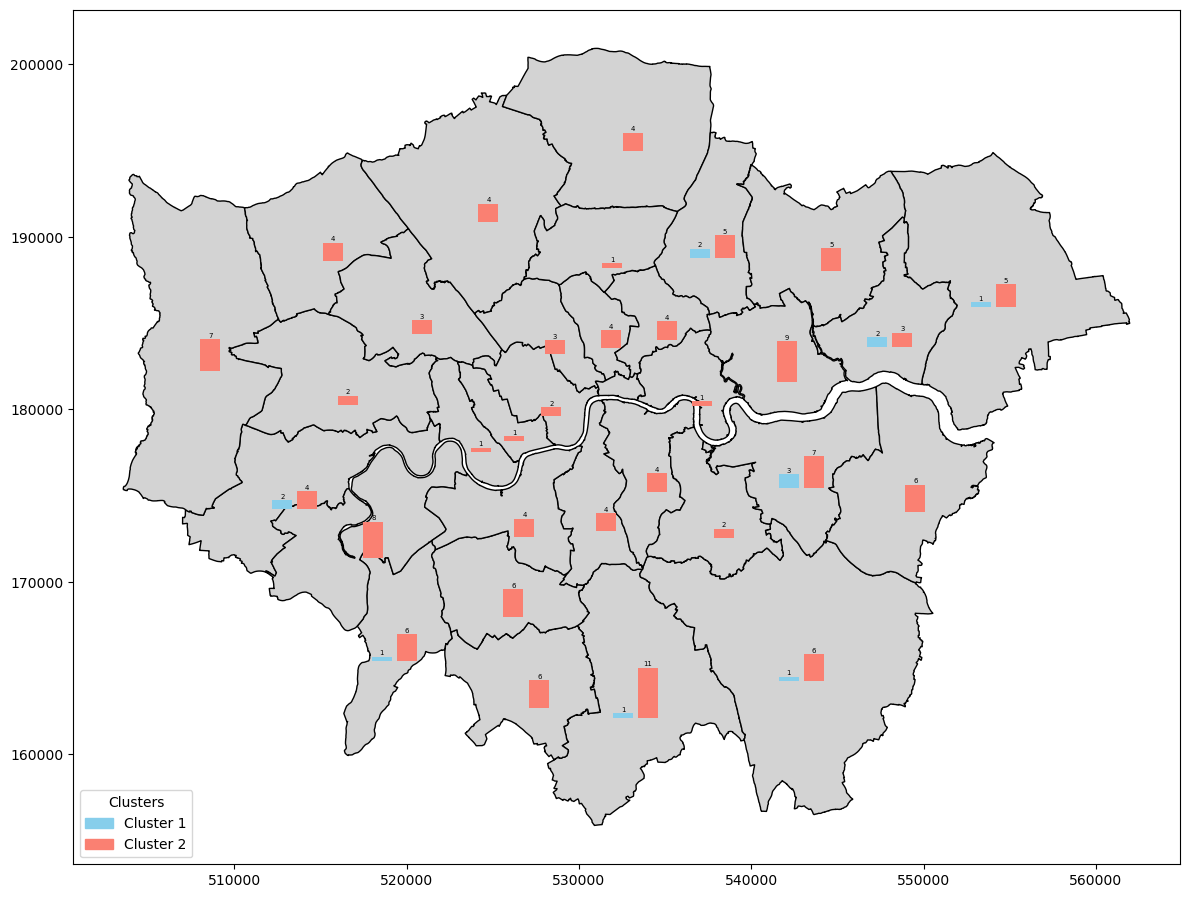

In [38]:
# This code is used to visualise distribution of cluster 1 and 2 per borough

# Merge cluster data with borough geometry
borough_map = borough.merge(borough_cluster, on='LAD11NM', how='left')

# Global max for consistent y-axis scale
global_max = borough_map[['cluster_1.0', 'cluster_2.0']].max().max()

fig, ax = plt.subplots(figsize=(12, 12))

# Base map
borough_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Loop through boroughs and draw bars
for idx, row in borough_map.iterrows():
    centroid = row['geometry'].centroid
    x, y = centroid.x, centroid.y
    values = [row.get('cluster_1.0', 0), row.get('cluster_2.0', 0)]
    if sum(values) == 0:
        continue
    ax_inset = inset_axes(ax, width=0.5, height=0.5, loc='center', 
                          bbox_to_anchor=(x, y), bbox_transform=ax.transData, 
                          borderpad=0)
    ax_inset.set_facecolor("none")
    for spine in ax_inset.spines.values():
        spine.set_visible(False)
    ax_inset.set_ylim(0, global_max)
    bars = ax_inset.bar([0, 1], values, color=['skyblue', 'salmon'])
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax_inset.text(bar.get_x() + bar.get_width() / 2,
                          height + global_max * 0.02,
                          f'{int(height)}',
                          ha='center', va='bottom',
                          fontsize=5)
            ax_inset.set_xticks([])
            ax_inset.set_yticks([])
            ax_inset.set_xlim(-0.5, 1.5)

# Legend
legend_handles = [mpatches.Patch(color='skyblue', label='Cluster 1'),
                  mpatches.Patch(color='salmon', label='Cluster 2')]
ax.legend(handles=legend_handles, title='Clusters', loc='lower left')
plt.axis('off')
plt.tight_layout()
plt.show()

This borough map shows that Croydon in South London is the borough with highest number of LSOA in cluster 2. Meanwhile, only several borough in outer part of the london has LSOA with cluster 1 with Greenwich as borough with the high number of LSOA in cluster 1.

### Classification Analysis

In [39]:
## This code is used to define categorical variables

# Categorical variables
categorical_vars = ['speed_limit', 'month', 'light_conditions',
                    'weather_conditions', 'carriageway_hazards',
                    'special_conditions_at_site', 'road_type']

                      Feature       VIF
0                 speed_limit  1.043427
6                   road_type  1.043289
2            light_conditions  1.019272
3          weather_conditions  1.015826
5  special_conditions_at_site  1.007704
4         carriageway_hazards  1.007511
1                       month  1.003748


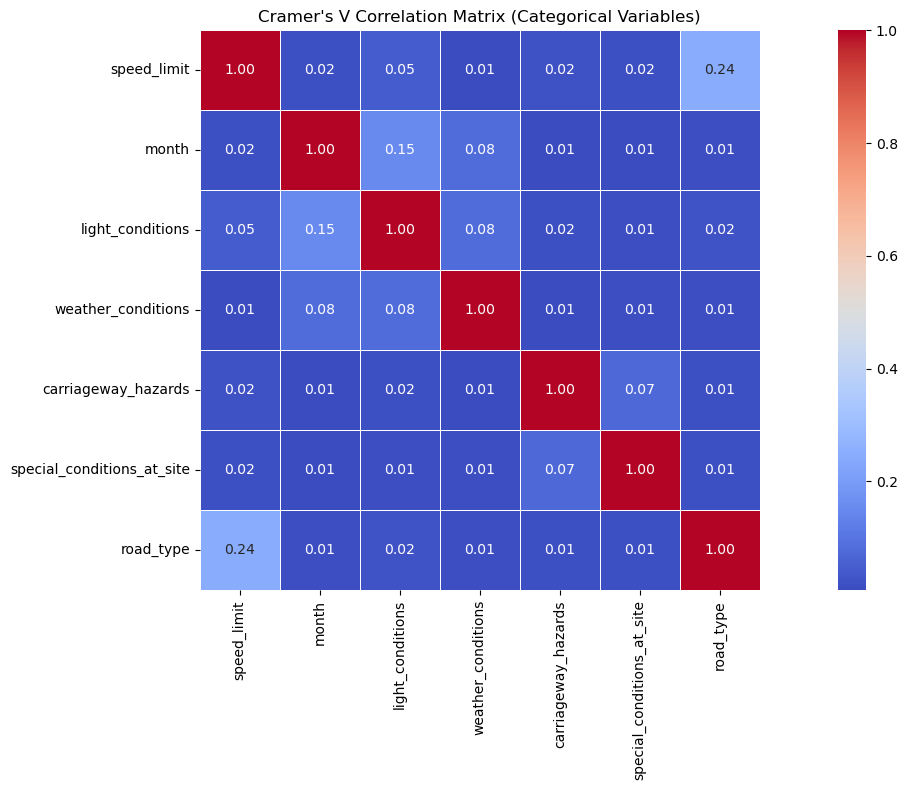

In [40]:
## This code is used to do multicollinearity analysis

# VIF
vif(collision, categorical_vars)

# Cramer's V
cramers(collision, categorical_vars)

In [41]:
## This code is used to generate dummy variables

# Dummy variables for road_type, month, special_conditions_at_site, and carriageway_hazards
dummy_vars = ['road_type', 'month', 'special_conditions_at_site', 'carriageway_hazards', 'speed_limit']
collision = pd.get_dummies(collision, columns = dummy_vars, drop_first = True)

In [42]:
## This code is used to split train and test to 70:30 ratio

# Drop unused columns for X
X = collision.drop(columns=['accident_year', 'weather_conditions', 'light_conditions', 
                            'number_of_vehicles', 'number_of_casualties', 'LSOA11CD', 
                            'LAD11NM', 'high_vehicles', 'high_casualties', 'severe_accident'])

# Define y
y = collision['severe_accident']

# Use the split_train_test function
X_train, X_test, y_train, y_test = split_train_test(X, y, test_size=0.3, random_state=42, stratify=True)

In [43]:
## This code is used to downsample the training dataset

# Downsample using function
X_down, y_down = downsample_data(X_train, y_train)

In [44]:
## This code is used to define the model and parameters

# Use GBDT for model
model = GradientBoostingClassifier(random_state=42)
param_grid = {'n_estimators': [80, 100],
              'max_depth': [2, 4],
              'min_samples_split': [4, 6],
              'min_samples_leaf': [6, 8],
              'subsample': [0.9, 1]}

In [45]:
## This code is used for hyperparameter tuning

# Use the tune_hyperparameters function
tune_hyperparameters(model, param_grid, X_down, y_down)

(GradientBoostingClassifier(max_depth=2, min_samples_leaf=6, min_samples_split=4,
                            n_estimators=80, random_state=42, subsample=0.9),
 {'max_depth': 2,
  'min_samples_leaf': 6,
  'min_samples_split': 4,
  'n_estimators': 80,
  'subsample': 0.9},
 0.5453968226952411)

In [46]:
## This code is used for 5-fold cross validation

# Use the cross_validate_model function
cross_validate_model(model, X_down, y_down)

Cross-validated ROC-AUC (OvR): 0.5438 ± 0.0055


(0.5437526904851123, 0.005452258392603829)


 Multiclass ROC-AUC (OvR): 0.5471

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.51      0.64     41182
           1       0.17      0.57      0.27      7497

    accuracy                           0.52     48679
   macro avg       0.52      0.54      0.45     48679
weighted avg       0.76      0.52      0.58     48679

Precision (macro): 0.519627606626065
Recall (macro): 0.5376595508939982
F1 Score (macro): 0.4530683262933474


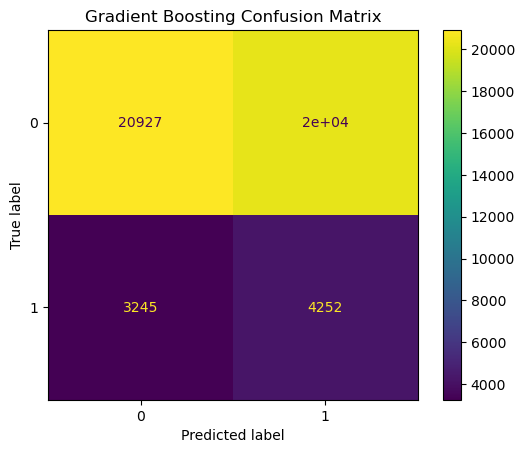

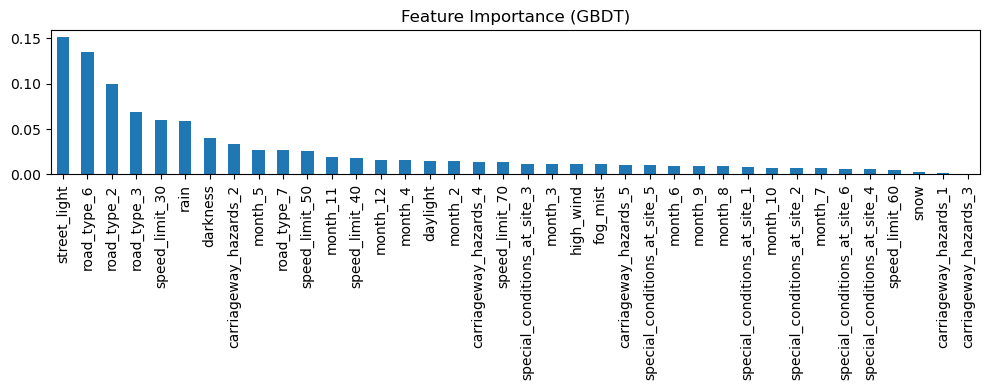

(GradientBoostingClassifier(random_state=42), 0.5470707555196005)

In [47]:
## This code is used to run machine learning algorithm

# Function for GBDT
gbdt(X_down, X_test, y_down, y_test)

The classification result shows a medium performance after data was downsampled. However it is good that the classification shows true positive more than false positive. To get more better result, I think the sampling should be divided again by crash type because this model does not differentiate between motor vehicle crash or bicycle crash which might also contribute to skewed data.

## Conclusion

[[ go back to the top ]](#Table-of-contents)

From clustering analysis, it can be seen that cluster with high rates are formed in the outer part of London. Meanwhile, from the classification analysis, light condition and road type appear to be the major factor in RTA.

## References

[[ go back to the top ]](#Table-of-contents)

Ashikuzzaman, Md. et al. (2021) ‘PSO-ANN in preventing traffic collisions: a comparative study’, Indonesian Journal of Electrical Engineering and Computer Science, 24(3), p. 1796. Available at: [https://doi.org/10.11591/ijeecs.v24.i3.pp1796-1803](https://doi.org/10.11591/ijeecs.v24.i3.pp1796-1803).

Assi, K. (2020) ‘Traffic Crash Severity Prediction—A Synergy by Hybrid Principal Component Analysis and Machine Learning Models’, International Journal of Environmental Research and Public Health, 17(20), p. 7598. Available at: [https://doi.org/10.3390/ijerph17207598](https://doi.org/10.3390/ijerph17207598).

Chai, A.B.Z. et al. (2024) ‘Enhancing road safety with machine learning: Current advances and future directions in accident prediction using non-visual data’, Engineering Applications of Artificial Intelligence, 137, p. 109086. Available at: [https://doi.org/10.1016/j.engappai.2024.109086](https://doi.org/10.1016/j.engappai.2024.109086).

Debnath, M., Tripathi, P.K. and Elmasri, R. (2015) ‘K-DBSCAN: Identifying Spatial Clusters with Differing Density Levels’, in 2015 International Workshop on Data Mining with Industrial Applications (DMIA). 2015 International Workshop on Data Mining with Industrial Applications (DMIA), San Lorenzo, Central, Paraguay: IEEE, pp. 51–60. Available at: [https://doi.org/10.1109/DMIA.2015.14](https://doi.org/10.1109/DMIA.2015.14).

Department for Transport (2025) ‘Road Safety Data’. Available at: [https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-accidents-safety-data](https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-accidents-safety-data).

Greater London Authority (GLA) (2024) ‘Statistical GIS Boundary Files for London’. Available at: [https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london](https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london).

Kamh, H. et al. (2025) ‘Exploring Road Traffic Accidents Hotspots Using Clustering Algorithms and GIS-Based Spatial Analysis’, IEEE Access, 13, pp. 60944–60954. Available at: [https://doi.org/10.1109/ACCESS.2024.3443245](https://doi.org/10.1109/ACCESS.2024.3443245).

Kumeda, B. et al. (2019) ‘Classification of Road Traffic Accident Data Using Machine Learning Algorithms’, in 2019 IEEE 11th International Conference on Communication Software and Networks (ICCSN). 2019 IEEE 11th International Conference on Communication Software and Networks (ICCSN), Chongqing, China: IEEE, pp. 682–687. Available at: [https://doi.org/10.1109/ICCSN.2019.8905362](https://doi.org/10.1109/ICCSN.2019.8905362).

Luo, J., Yuan, Y. and Xu, S. (2025) ‘Improving GBDT performance on imbalanced datasets: An empirical study of class-balanced loss functions’, Neurocomputing, 634, p. 129896. Available at: [https://doi.org/10.1016/j.neucom.2025.129896](https://doi.org/10.1016/j.neucom.2025.129896).

MAYOR OF LONDON (2018) ‘Vision Zero Action Plan’. Transport for London. Available at: [https://content.tfl.gov.uk/vision-zero-action-plan.pdf](https://content.tfl.gov.uk/vision-zero-action-plan.pdf).

Meng, H., Wang, Xinhong and Wang, Xuesong (2018) ‘Expressway Crash Prediction based on Traffic Big Data’, in Proceedings of the 2018 International Conference on Signal Processing and Machine Learning. SPML ’18: 2018 International Conference on Signal Processing and Machine Learning, Shanghai China: ACM, pp. 11–16. Available at: [https://doi.org/10.1145/3297067.3297093](https://doi.org/10.1145/3297067.3297093).

Oukawa, G.Y., Krecl, P. and Targino, A.C. (2022) ‘Fine-scale modeling of the urban heat island: A comparison of multiple linear regression and random forest approaches’, Science of The Total Environment, 815, p. 152836. Available at: [https://doi.org/10.1016/j.scitotenv.2021.152836](https://doi.org/10.1016/j.scitotenv.2021.152836).

Molinara, M., Ricamato, M.T. and Tortorella, F. (2007) ‘Facing Imbalanced Classes through Aggregation of Classifiers’, in 14th International Conference on Image Analysis and Processing (ICIAP 2007). 14th International Conference on Image Analysis and Processing (ICIAP 2007), Modena, Italy: IEEE, pp. 43–48. Available at: [https://doi.org/10.1109/ICIAP.2007.4362755](https://doi.org/10.1109/ICIAP.2007.4362755). 

Paing, M.P. et al. (2018) ‘Comparison of Sampling Methods for Imbalanced Data Classification in Random Forest’, in 2018 11th Biomedical Engineering International Conference (BMEiCON). 2018 11th Biomedical Engineering International Conference (BMEiCON), Chiang Mai: IEEE, pp. 1–5. Available at: [https://doi.org/10.1109/BMEiCON.2018.8609946](https://doi.org/10.1109/BMEiCON.2018.8609946).

Rayward-Smith, V.J. (2007) ‘Statistics to measure correlation for data mining applications’, Computational Statistics & Data Analysis, 51(8), pp. 3968–3982. Available at: [https://doi.org/10.1016/j.csda.2006.05.025](https://doi.org/10.1016/j.csda.2006.05.025).

Santos, D. et al. (2021) ‘Machine Learning Approaches to Traffic Accident Analysis and Hotspot Prediction’, Computers, 10(12), p. 157. Available at: [https://doi.org/10.3390/computers10120157](https://doi.org/10.3390/computers10120157).

Sattar, K. et al. (2023) ‘Transparent deep machine learning framework for predicting traffic crash severity’, Neural Computing and Applications, 35(2), pp. 1535–1547. Available at: [https://doi.org/10.1007/s00521-022-07769-2](https://doi.org/10.1007/s00521-022-07769-2).

Transport for London (2024) New statistics show lowest number of people killed on London’s roads outside of pandemic years. Available at: [https://tfl.gov.uk/info-for/media/press-releases/2024/may/new-statistics-show-lowest-number-of-people-killed-on-london-s-roads-outside-of-pandemic-years](https://tfl.gov.uk/info-for/media/press-releases/2024/may/new-statistics-show-lowest-number-of-people-killed-on-london-s-roads-outside-of-pandemic-years).

Vybhavi, G.Y. et al. (2024) ‘Clustering algorithms in data science: Evaluating the time and space complexities of K-means, DBSCAN, and hierarchical methods’, in. 15TH INTERNATIONAL CONFERENCE ON MATERIALS PROCESSING AND CHARACTERIZATION 2023, Newcastle, England, p. 050004. Available at: [https://doi.org/10.1063/5.0215042](https://doi.org/10.1063/5.0215042).

Yang, W. and Han, S. (2025) ‘Direct and indirect effects of road attributes on traffic safety’, Journal of Safety Research, 93, pp. 156–169. Available at: [https://doi.org/10.1016/j.jsr.2025.02.017](https://doi.org/10.1016/j.jsr.2025.02.017).

Zhao, H. et al. (2020) ‘Deep Learning-based Prediction of Traffic Accident Risk in Vehicular Networks’, in 2020 IEEE Globecom Workshops (GC Wkshps. 2020 IEEE Globecom Workshops (GC Wkshps), Taipei, Taiwan: IEEE, pp. 1–5. Available at: [https://doi.org/10.1109/GCWkshps50303.2020.9367497](https://doi.org/10.1109/GCWkshps50303.2020.9367497).